# Chapter 3

_This notebook has been adapted from those taught by [Ted Petrou](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning). I've added additional explanations and corresponding code to parts of the book that were not covered in the original notebooks._

# Linear Regression
Used to predict quantitative (numerical) response. 
* Can we determine if a relationship exists between predictors and response?
* Hows strong is this relationship?
* Which predictors are related to response?
* How accurate are predictions once model is fit?
* Is a linear model appropriate?
* Are there interaction effects?

# Simple Linear Regression
Technically this means one predictor is linearly related to the response. $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters. Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.available
plt.style.use("ggplot")

In [2]:
adv = pd.read_csv('../data/Advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


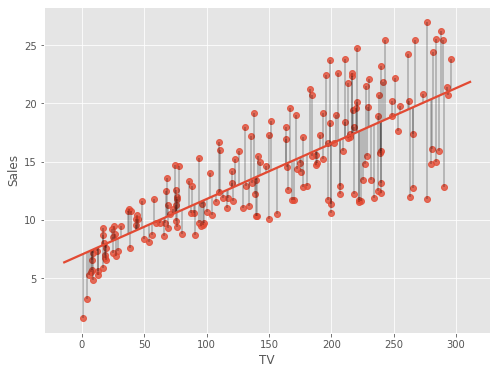

In [3]:
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv, ci=None)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [4]:
fit

array([0.04753664, 7.03259355])

# Quantifying Best Line
Many lines can be arbitrarily drawn through the advertising data above. Typically the line that minimizes the sum of squared error (also called residual sum of squares (RSS)) between the points and the estimated line is used. But you are free to choose the line of your choice when modeling. Least absolute error, connecting a line through the first and last points, a hand drawn line are different ways you could model the relationship.

The line above was fitted using numpy's polyfit function, with a final model of $\hat{Y} = 7 + .048X$. For every one unit increase in X a .048 increase in Sales would happen. Since the data is in thousands, every $1,000 dollars in advertising spent corresponds to an increase of 48 sales.

# Different Parameter Values
Different values of the parameter's each produce different values of the mean squared error (the metric used to determine best fit). The work below outlines a number of combinations of both $\hat{\beta_0}$ and $\hat{\beta_1}$ through contour lines that show the error at each combination and a corresponding 3D plot. The central point in each figure is the point where MSE is minimized.

In [5]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(.03, .07, 50)

y = adv['Sales'].values

errors = []
for b_0 in b0:
    for b_1 in b1:
        yhat = b_0 + b_1 * adv['TV'].values
        errors.append(np.mean((y - yhat)**2))
errors = np.array(errors)

### Visualize $B_0$ and $B_1$ parameter space

In [6]:
# Create a 2D mesh grid for each parameter and the errors
B0, B1 = np.meshgrid(b0, b1)
errors_mesh = errors.reshape(B0.shape)

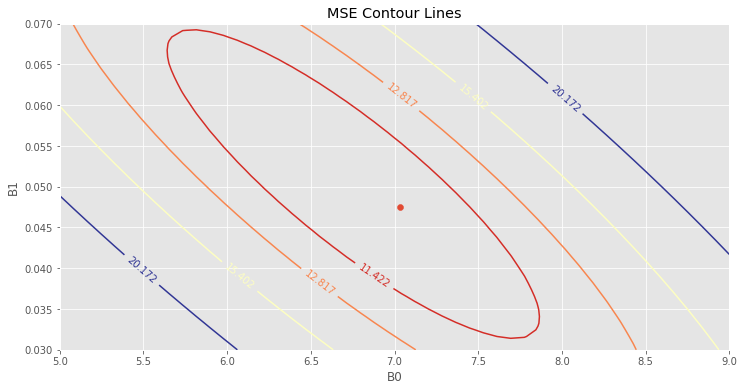

In [7]:
cmap = plt.cm.RdYlBu
plt.figure(figsize=(12,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=sorted(errors)[::500])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.xlabel('B0')
plt.ylabel('B1')
plt.scatter(fit[1], fit[0]);
plt.title('MSE Contour Lines');

This figure shows the contour lines for the Mean Squared Error (MSE). Each line shows the parameters $B_0$ and $B_1$ that achieve that MSE, and the red dot shows the minimum MSE of the parameters selected using Least Squares to estimate $B_0$ and $B_1$

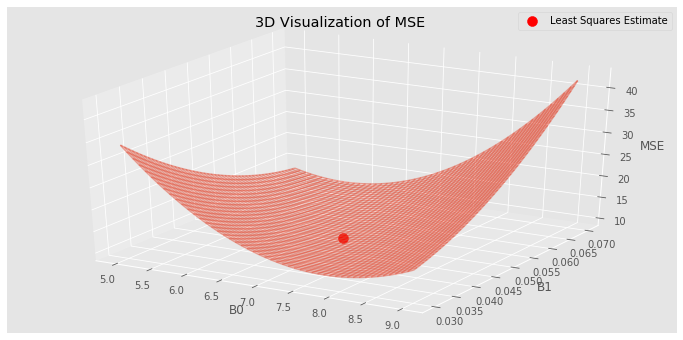

In [8]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(fit[1], fit[0], errors_mesh.min(), s=100, c='r', label='Least Squares Estimate')
ax.plot_wireframe(B0, B1, errors_mesh, alpha=.5)

plt.legend()
ax.set_xlabel('B0')
ax.set_ylabel('B1')
ax.set_zlabel('MSE')
plt.title('3D Visualization of MSE ');

**Average of samples of least squares lines**

Here we randomly select 100 samples with their corresponding dependent variables and fit a least-squares regression line to that sample. We plot each line fit on the sample and see that on average these lines are close to the least squares line fit on the entire dataset. 

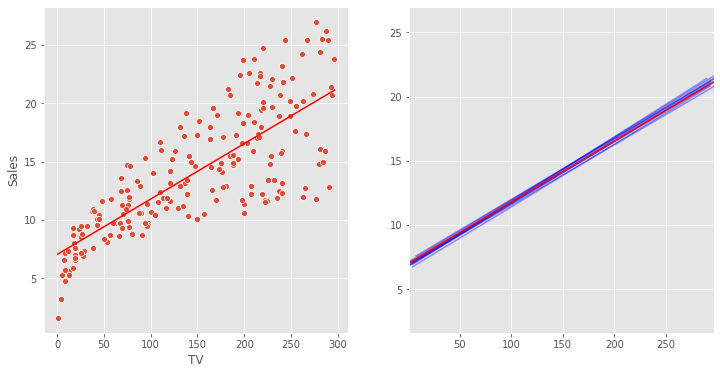

In [9]:
fig, axes = plt.subplots(ncols=2,figsize=(12, 6))
sns.scatterplot('TV', 'Sales', data=adv,  ax=axes[0])

for x in range(10):
    adv_sample = adv.sample(100)
    fit = np.polyfit(adv_sample['TV'], adv_sample['Sales'], deg=1)
    y_hat = fit[1] + adv_sample['TV'] * fit[0]
    axes[1].plot([adv_sample['TV'].min(), adv_sample['TV'].max()],[y_hat.min(), y_hat.max()], alpha=.4, c='blue')

fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]
axes[0].plot([adv['TV'].min(), adv['TV'].max()],[y_hat.min(), y_hat.max()], c='red', label='Least Squares Line')
axes[1].plot([adv['TV'].min(), adv['TV'].max()],[y_hat.min(), y_hat.max()], c='red', label='Least Squares Line')
axes[1].set_ylim(adv['Sales'].min(), adv['Sales'].max())
axes[1].set_xlim(adv['TV'].min(), adv['TV'].max());

Left: The red line represents the least squares line; it is the least squares estimate for $f(X)$ based on the observed data, shown in black. 

Right: Ten least squares lines are shown, each computed on the basis of a separate random set of observations. Each least squares line is different, but on average, the least squares lines are quite close to the population regression line.

# True Regression Line
The theoretical best linear relationship can be defined as: $$Y = \beta_0 + \beta_1 X + \epsilon$$

This 'population regression line' will never be known in practice and remain unobserved unless it came from simulated data.

**Unbiased** - An estimator that doesn't systematically over or underestimate the value of the parameter it is estimating

### How accurate our our estimators?
It's great that our linear regression model using least-squares produced a line that looks right, but how much will this line expect to vary from sample to sample?

In the case of estimating a sample mean $\hat{\mu}$ from a number of points $n$, we get that the $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ where $\sigma$ is the standard distribution of the original set of $n$ points. The square root of this value is called the **standard error** and gives us a rough idea of how much the estimator will change from sample to sample. Formulas for standard errors of $\beta_0$ and $\beta_1$ are given in the text.

### Confidence intervals of estimators
Knowing how to derive our standard error and assuming the errors are Gaussian we can generate a confidence interval based on a t-distribution. For instance, approximately 95% of all samples will be contained in the following interval: $\beta_1 \pm 2 * SE(\beta_1)$.

### Using standard errors for hypothesis testing
If the standard error is large and the estimated value small then the estimator might not be significantly different than 0, meaning it statistically is insignificant. To test significance a hypothesis test can be done on any of the predictors. The hypothesis test is usually done to test whether the predictor is different than 0. The null hypothesis $$H_0: \beta_1 = 0 $$

is tested against the alternative
$$H_a: \beta_1 \ne 0 $$

To test this we find out how many standard errors our parameter is away from 0. 
$$
\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}
$$

This result is a t-statistic. The t-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the **p-value** and used as a measure of how extreme the results of your data are. The smaller the p-value the more extreme the results and the more likely they did not come from randomness.

## What p-value is good enough
The most standard p-value that you will encounter in the real world is .05, which means that if you can demonstrate that there is at least at 95% chance that your estimator did not arise from randomness you will reject the null hypothesis and note that there is a statistically significant difference between your estimator and 0.

## Cautionary tales of p-values
95% sounds pretty solid until you realize that there are millions of studies that have been done and just by randomness 5% will have falsely concluded statistically significance when there was none. Below is some work that shows (using a binomial distribution that when tossing a fair coin 100 times, there is just about a 95% chance that you will get between 41 and 59 heads/tails. That means tossing 40 or less or 60 or more coins would generate a p-value of .05 or less. Would you be satisfied with someone telling you a coin was biased after getting 60 heads? This effect is compounded in real life experiments where there are lots of unknowns and lots of assumptions that are getting violated. Maybe enforcing a p-value of .01 would be a better choice.

In [10]:
# Calculate exact probability using a binomial distribution for those between 41 and 59
from scipy.special import comb
probs = [comb(100, i) * .5 ** 100 for i in range(41, 60)]

In [11]:
# What is the probability of generating between 41 and 59 heads?
sum(probs)

0.9431120663590192

In [12]:
# simulate some data. Toss a coin 100 times and get find percentage heads. Do this 1000 times and see how many
# trials have 60 or more heads
# About 2.5% of the time we will have concluded the coin is biased when it is not!
((np.random.rand(1000,100) > .5).mean(1) >= .6).mean()

0.022

# Accuracy of the Model
Above we discussed the accuracy and significance of the parameters in the model. Now to discuss the accuracy of the model. One simple way is to look at the regression line drawn through the points - the first plot in this notebook. We can see that the data is still quite noisy and there will be a high degree of variance no matter where we are on the line.

# How much better than randomness?
One direct way of measuring the model is to find out how much better the model does than randomness. For this, we must have a model for randomness - and that model is not just randomly choosing a point but is choosing the mean of all the points.

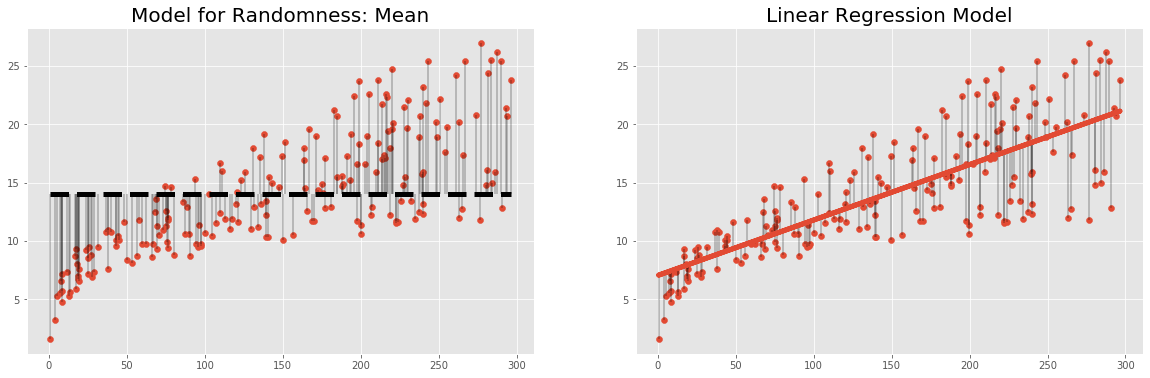

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.scatter(adv['TV'], adv['Sales'])
ax1.hlines(adv['Sales'].mean(), adv['TV'].min(), adv['TV'].max(), linestyle='--', lw=5)
ax1.vlines(adv['TV'], adv['Sales'].mean(), adv['Sales'], lw=.4)
ax1.set_title("Model for Randomness: Mean", fontsize=20)

ax2.scatter(adv['TV'], adv['Sales'])
ax2.plot(adv['TV'], adv['TV'] * fit[0] + fit[1], lw=5)
ax2.vlines(adv['TV'], adv['TV'] * fit[0] + fit[1], adv['Sales'], lw=.4)
ax2.set_title("Linear Regression Model", fontsize=20);

# Errors using the Mean and Errors using the Model
As you can see above the errors when using the mean are greater than the errors using the model. Lets plot a histogram of the absolute value of the errors of each to more easily view what is taking place. Looking at the histogram its obvious that a the model is producing a better fit.

In [15]:
errors_mean = abs(adv['Sales'] - adv['Sales'].mean())
errors_model = abs(adv['Sales'] - (adv['TV'] * fit[0] + fit[1] ))

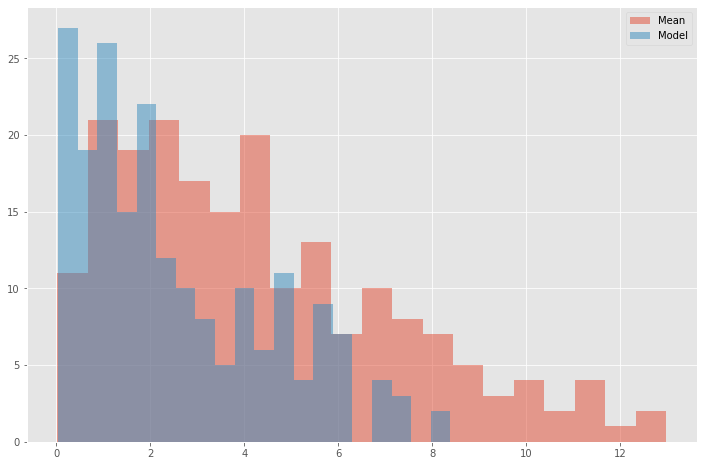

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(errors_mean, alpha = .5, label="Mean", bins=20)
plt.hist(errors_model, alpha=.5, label="Model", bins=20)
plt.legend();

In [17]:
# How often is the model better
# Somewhat suprisingly, only 71.5 % of the time, the model is better than the mean
(errors_model < errors_mean).mean()

0.715

# Assessing Model Accuracy

The quality of a linear regression fit is typically assessed using two related quantities: the _residual standard error_ (RSE) and the $R^2$ statistic.

### Residual Standard Error

Roughly speaking, it is the average amount that the response will deviate from the true regression line.
$$
RSE = \sqrt{\frac{1}{n-1}RSS}
$$
Where the _residual sum of squares_ (RSS) is:
$$
RSS = \sum(y-\hat{y})^2
$$


**Some other important measures**
The total sum of squares (TSS) is defined as the sum of all the squared deviations from the mean. This serves as a baseline as to how much _variance_ there is in the model. 

$$
TSS = \sum{(y - \bar{y})^2}
$$

In [18]:
TSS = (errors_mean ** 2).sum()
RSS = (errors_model ** 2).sum()
RSE = np.sqrt(RSS/(errors_model.shape[0]-2))
print('TSS = ',TSS)
print('RSS = ', RSS)
print('RSE = ',RSE)

TSS =  5417.14875
RSS =  2102.530583131351
RSE =  3.258656368650462


In [19]:
errors_model.shape

(200,)

# R2 Statistic

$R^2$ is a statistic that can tell us what percentage of the total variation ($TSS$) has been 'explained' by the model. Or what percentage of the variation ($TSS$) was removed by using the model. 

$$
R^2 = 1-\frac{RSS}{TSS}
$$

**Explanation:**

If we calculate $\frac{RSS}{TSS}$, that would give us the percentage of variation left after using our model. 

Calculating $1 - \frac{RSS}{TSS}$ would give us the _total amount of variation captured by the model_. 

A number close to 1 would indicate a better fit. For the current model we can say: 61% of the variation was explained by X (TV advertising)

In [20]:
# R-squared
1 - RSS / TSS

0.6118750508500712

**F-statistic**

We will properly define this later, but at a glance it tells us if there is a relationship between the predictors and the dependent variable. 

When using a single variable we can use hypothesis testing based on the Standard Error of the coeficient ($\beta_1$) of that variable. However, when using multiple variables this becomes more tricky and then the F-statistic is the standard way to test whether a relationship exists. 

In [21]:
# F - Statistic MSR / MSE
MSR = (TSS - RSS) / 1
MSE = RSS / (errors_model.size - 1 - 1)
F_stat = MSR / MSE
F_stat

312.1449943727131

# Using the statsmodels api
The excellent [statsmodels library](http://statsmodels.sourceforge.net/) integrates neatly with the pandas DataFrame to do statistical analysis. 

In [22]:
import statsmodels.formula.api as smf

Fit an ordinary least squares (OLS) model using TV to estimate Sales:

In [23]:
results = smf.ols('Sales ~ TV', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        12:11:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Simple linear regression with newspaper
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 03 Apr 2020   Prob (F-statistic):            0.00115
Time:                        12:11:34   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression


Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors. Doing this results in Newspaper becoming insignificant.

In [25]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        12:11:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conflicting Results**

Notice from the coeficients table that Newspaper has a high p-value, which implies no relationship between sales and Newspaper. However, our previous analysis using Newspaper alone indicated that there _is_ a relationship. 

How can that be?

Lets look at the correlations between variables:

In [26]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Notice that the correlation between radio and newspaper is 0.35. This means there is a tendency to spend more on newspaper advertising when more is spent on radio advertising. 

Now assume the multiple linear regression results are correct, and that newspaper advertising does not itsself influence sales but radio advertising does. Then in markets where more is spent on radio advertising we will observe increased sales, but those same markets will have a higher spend in newspaper advertising as well (due to the positive correlation). 

 Hence, in a simple linear regression which only examines sales versus newspaper, we will observe that higher values of newspaper tend to be associated with higher values of sales, even though newspaper advertising does not actually affect sales. So newspaper sales are a surrogate for radio advertising; newspaper gets “credit” for the effect of radio on sales.



# Hypothesis Testing in Multiple Linear Regression

We are trying to answer the question: "_Is there a relationship between the predictors and the response?_"

To do so, we can use hypothesis testing on the parameters of the model. In other words we want to test the nul hypothesis that all parameters are zero

$$
H_0: \beta_1 = \beta_2 = \ldots \beta_p = 0
$$

And the alternative hypothesis is:

$$
H_1: \text{at least one } \beta \text{ is non-zero}
$$

We can use the F statistic to test this hypthothesis:

$$
F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}
$$

When there is no relationship between the predictors and the dependent variable, the F statistic will be 1. The critical value of F, or the value at which we reject the $H_0$ is dependent on $n$ and $p$. 

As $n$ (the number of samples) increases, so the critical value of F decreases. When $p > n$, then the F-statistic cannot be used.  

In general, we will rely on statistical software to calculate the p-value associated with the F-statistic for a regression model. 

# Selecting a subest of a model
In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But if the number of predictors were more, it might be troubling to manually fit many models and hand-select which variables to include in the model. Forward, backward and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R-squared

* Forward - starts with an empty model and adds one variable at a time until the statistic is maximized
* Backward - starts with a full model and removes one variable at a time
* Mixed - starts empty and either removes or adds a variable at each step

## Refit without Newspaper

We saw previously that Newspaper does not have a relationship with Sales. Now, lets remove that predictor and refit the least squares model.

In [27]:
results = smf.ols('Sales ~ TV + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           4.83e-98
Time:                        12:11:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Result**

Notice that the R-squared statistic is virtually unchanged. This tells us that Newspaper does not add much to the model's ability to account for the variability in the dependent variable. 

## Calculate Prediction and Confidence Intervals

We use a confidence interval to quantify the uncertainty surrounding
the average sales over a large number of cities. For example, given that
\\$100,000 is spent on TV advertising and \\$20,000 is spent on radio advertising
in each city, the 95 % confidence interval is [10,985, 11,528].

In [36]:
d = pd.Series({'Intercept': 1, 'TV': 100000, 'Radio': 20000})
d

Intercept         1
TV           100000
Radio         20000
dtype: int64

In [54]:
results.get_prediction(d).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8338.287142,206.461133,7931.12947,8745.444815,7931.115969,8745.458316


In [41]:
# Coeficienct values
results.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [48]:
# Lower
(d * results.conf_int()[0]).sum()

7746.407992786442

In [49]:
# Higher
(d * results.conf_int()[1]).sum()

8930.166292065947

# Categorical predictor variables
Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called qualitative or factor variables. 


In [28]:
credit = pd.read_csv('../data/Credit.csv')

In [29]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [30]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


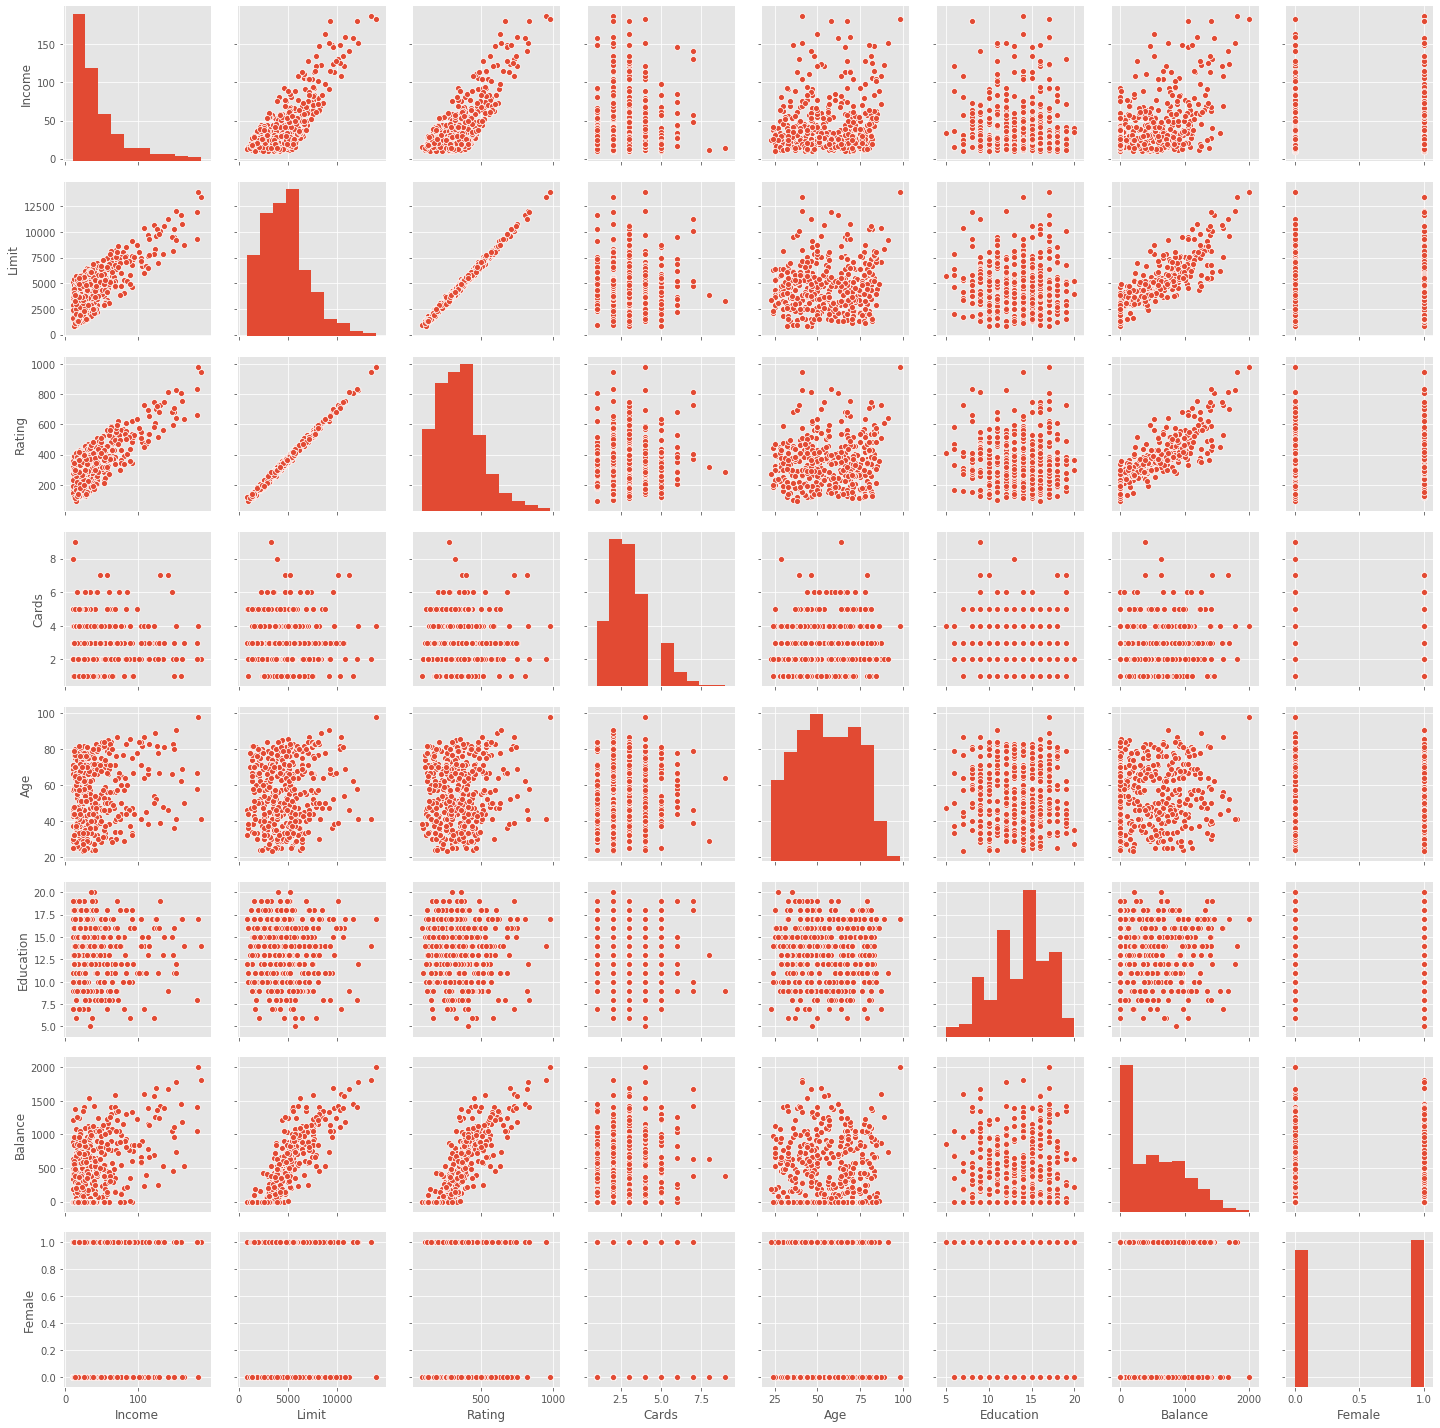

In [31]:
sns.pairplot(credit)

In [32]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 02 Apr 2020   Prob (F-statistic):              0.669
Time:                        11:37:18   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# same thing
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

# The broken assumptions of a linear model
There are several assumptions that are used when fitting a linear model. 
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* The predictor variables are independent. An increase in one won't result in an increase in another
* The change in response for a one unit increase in X is the same no matter what the value of X

# Challenging the linearity constraint through interaction effects
In a linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together.

In [34]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          6.68e-146
Time:                        11:37:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression is Still Linear
Despite the fact that the regression line can be visibly non-linear the squaring predictor variables still means we are doing linear regression. The requirements for a regression to be 'linear' is to have it linear in the parameters. Heres a good link discussing the difference between linear and non-linear regression. http://blog.minitab.com/blog/adventures-in-statistics/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

In [35]:
# Nonlinearity of data
resid = adv['Sales'] - results.predict(adv)

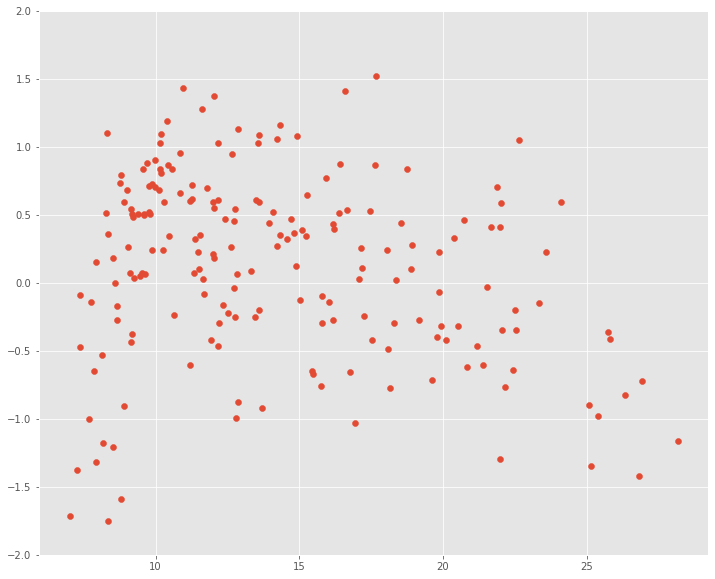

In [36]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2);

## Interaction Terms with Categorical Variables

Suppose that we wish to predict balance using the income (quantitative) and student (qualitative) variables. 

In [37]:
credit['is_student'] = (credit.Student == 'Yes').astype(int)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female,is_student
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0


In [38]:
result = smf.ols('Balance ~ Income + is_student', credit).fit()
print('R2 without interaction: ',result.rsquared_adj)

result = smf.ols('Balance ~ Income + is_student + Income * is_student', credit).fit()
print('R2 with interaction: ',result.rsquared_adj)

R2 without interaction:  0.27381888336961213
R2 with interaction:  0.2744282765700351


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           4.94e-28
Time:                        11:37:19   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           200.6232     33.698      5.953      0.000     134.373     266.873
Income                6.2182      0.592     10.502      0.000       5.054       7.382
is_student          476.6758    104.351      4.568      0.000     271.524     681.827
Income:is_student    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Potential Problems with MLR

1. Non-linearity of the response-predictor relationships. 
2. Correlation of error terms.
3. Non-constant variance of error terms.
4. Outliers.
5. High-leverage points.
6. Collinearity.

## Non-linearity of the Data

The linear model assumes that there is a linear relationship between the predictors and the dependent variable. More often than not, this is not a valid assumption, and even though we can use interaction terms to account non-linear effects this might not be enough. 


_Residual plots_ are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $\epsilon_i = y − \hat{y}$ , versus the predictor $x$.

To illustrate this, lets fit two models to the `Auto` dataset:

1. A linear model:`"mpg ~ horsepower"`
2. A quadradratic model:  `"mpg ~ horsepower + horsepower^2"`

And look at the residual plots for both

In [40]:
import statsmodels.api as sm

auto = pd.read_csv('../data/auto.csv')
auto.set_index('name',inplace=True)

linear_results = smf.ols("mpg ~ horsepower", auto).fit()
quad_results = smf.ols("mpg ~ horsepower + I(horsepower**2)", auto).fit()

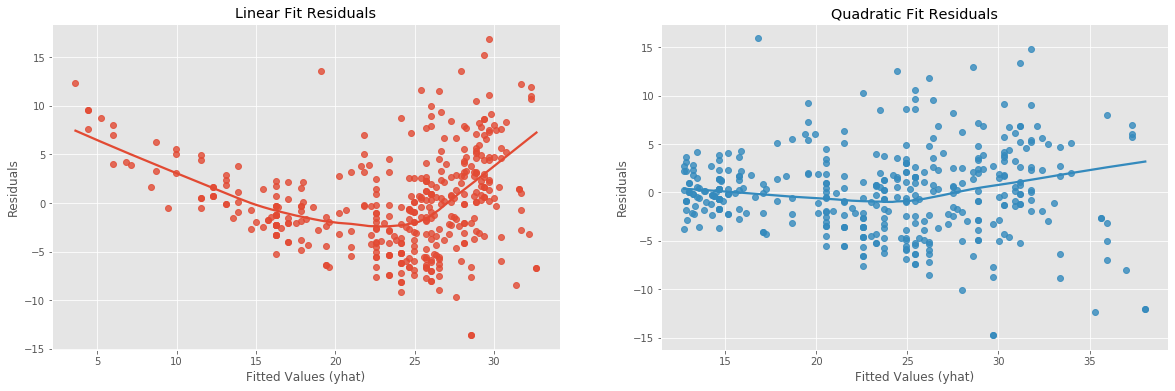

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

ax=axes[0]
sns.regplot(linear_results.get_prediction(auto).predicted_mean, linear_results.resid, ci=None, lowess=True,ax=ax)
ax.set_title('Linear Fit Residuals')
ax.set_xlabel('Fitted Values (yhat)')
ax.set_ylabel('Residuals')

ax=axes[1]
sns.regplot(quad_results.get_prediction(auto).predicted_mean, quad_results.resid, ci=None, lowess=True, ax=ax)
ax.set_title('Quadratic Fit Residuals')
ax.set_xlabel('Fitted Values (yhat)')
ax.set_ylabel('Residuals')
plt.show()

**Note**

Notice how for the linear model there is a visible relationship between the predicted values and the residuals, while for the quadratic model there is almost no trend in the data. This tells us that the relationship between the predictors and dependent variable was non-linear, and a linear model was not a good choice for modelling that data.  

## Correlated Errors

**When?**

* Duplicated data
* Data leakage - for example in time series data
* Groups within the dataset not accounted for during modelling - for example multiple recordings per patient, but patient ID not included as predictor.


**Effect**:

Correlated erros can cause an optimistic confidence in the model. 


## Non-constant Variance of Error Terms (heteroscedacity)

Heteroscedacity means that the variance of a variable is not constant over some other variable. In general, we refer to this w.r.t the dependent variable. 

**When?**

* Not certain - various reasons

**Effect:**

* Standard errors, confidence intervals and hypothesis tests (F-statistic etc) are all influenced.


**Fix**:

* log transform of Y
* square root of Y

<img src="../figures/Chapter3/3.11.pdf.png" alt="drawing" width="600px"/>

This figure shows an example of heteroscedasic errors before and after applying the log function to Y.


### Weighted Least Squared

Sometimes we have a good idea of the variance of each response. For example, the $i$th response could be an average of $n_i$ raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has variance $\sigma_{i}^{2} = \frac{\sigma^2}{n_i}$. 

In this case a simple remedy is to fit our model by _weighted least squares_, with weights proportional to the inverse variances—i.e. $w_i = n_i$ in this case. Most linear regression software allows for observation weights.



## Outliers

**When?**

* Measurement errors is a typical reason


**Effect**

* Might not have an effect on the regression line, but will have an effect on goodness of fit measurements such as $R^2$ and RSE


**Fix**

Residual plots can be used to identify outliers. In practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the studentized residuals, computed by dividing each residual ei by its estimated standard error. Observations whose studentized residuals are greater than 3 in abso- lute value are possible outliers

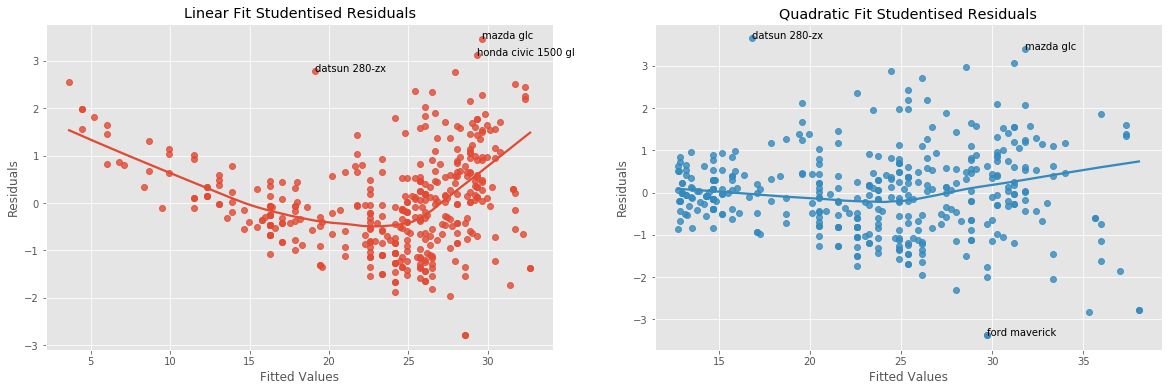

In [42]:
def resid_plot(results, ax=None, studentise=False, title='', annot=True):
    """
    Create a classical residual plot from a fitted OLS model.
    """
    
    fitted = results.fittedvalues
    
    if studentise:
        residuals = results.get_influence().resid_studentized_internal
    else:
        residuals = results.resid.values
        
    data = pd.DataFrame({'fitted': fitted, 'residuals': residuals})
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    
    sns.regplot('fitted', 'residuals',data, ci=None, lowess=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    
    if annot:
        top3 = data.reset_index(drop=True).residuals.abs().sort_values().nlargest(3)

        for i in top3.index:
            idx = data.index.values[i]
            ax.annotate(idx, xy=(data.fitted.values[i], data.residuals.values[i]))
    
    return
    
    

fig, axes = plt.subplots(ncols=2, figsize=(20,6))

# A different way of getting studentized residuals
# linear_student_resid = linear_results.get_influence().resid_studentized_internal
# quad_student_resid = quad_results.get_influence().resid_studentized_internal

ax=axes[0]
resid_plot(linear_results, ax=ax, studentise=True, title='Linear Fit Studentised Residuals')

ax=axes[1]
resid_plot(quad_results, ax=ax, studentise=True, title='Quadratic Fit Studentised Residuals')

plt.show()

## High Leverage Points

High leverage points are those that influence the regression line much more than others. It's an issue, because it might cause the model to have a significantly high variance, which can be difficult to pick up not knowing about these points.

In order to quantify an observation’s leverage, we compute the _leverage statistic_:

$$
h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum(x-\bar{x})^2}
$$

_This is the single-variable leverage statistics. We will mostly use a multi-variate version, and for that rely on statsmodels or other libraries._

The leverage statistic always lies between $\frac{1}{n}$ and $1$, and average for all values is always equal to $\bar{h} = \frac{(p+1)}{n}$. So if an observation has a much higher value than $\bar{h}$ then it can be considered a high leverage point. 

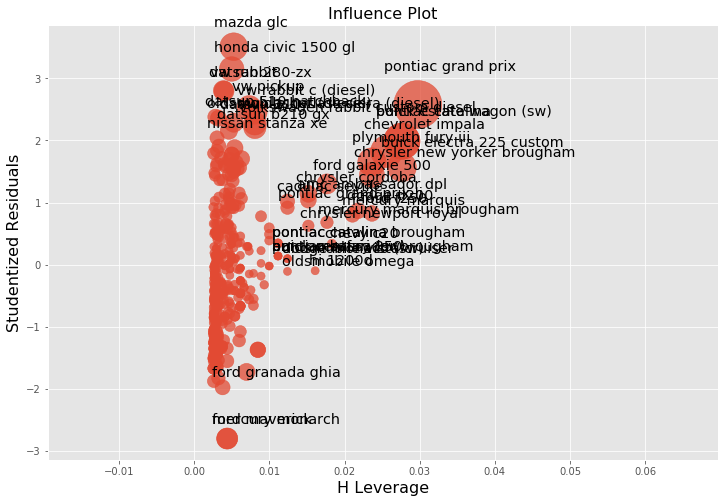

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(linear_results, ax=ax, criterion="cooks")

## Colinearatiy

_Collinearity_ refers to the situation in which two or more predictor variables are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response.


### Effect of colinearity
* Colinearity increases the SE of the regression coefficients. 
* Consequently, collinearity results in a decline in the t-statistic.
* This means that the _power_ of the hypothesis test (the probability of correctly detecting a non-zero coefficient) is reduced by collinearity.

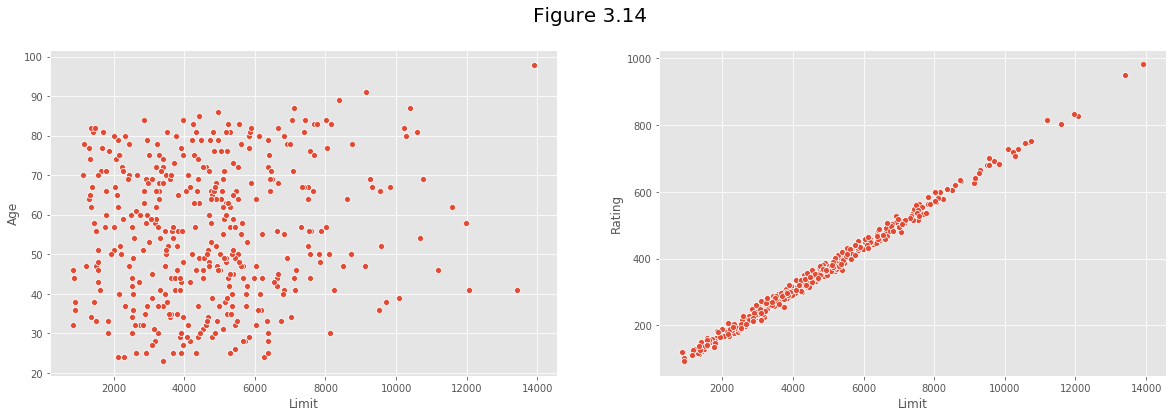

In [67]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
fig.suptitle('Figure 3.14', fontsize=20)

sns.scatterplot(data=credit, y='Age',x='Limit',ax=axes[0])
sns.scatterplot(data=credit, y='Rating',x='Limit',ax=axes[1])

plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

y = credit.Balance

ols_1 = LinearRegression()
X_1 = scale(credit[['Age','Limit']], with_mean=True, with_std=False)
ols_1.fit(X_1, y)
print('Coefficients: Age & Limit: ',ols_1.coef_)
print('Intercept: ',ols_1.intercept_)

ols_2 = LinearRegression()
X_2 = scale(credit[['Rating','Limit']], with_mean=True, with_std=False)
ols_2.fit(X_2, y)
print('\nCoefficients: Rating & Limit: ',ols_2.coef_)
print('Intercept: ',ols_2.intercept_)

Coefficients: Age & Limit:  [-2.29148553  0.17336497]
Intercept:  520.0150000000001

Coefficients: Rating & Limit:  [2.20167217 0.02451438]
Intercept:  520.015


In [130]:
B_Age = np.linspace(-2.2915 - 3, -2.2915 + 3)
B_Limit1 = np.linspace(0.173-0.02, 0.173+0.02)

B_Rating = np.linspace(2.202 - 3, 2.202 + 3)
B_Limit2 = np.linspace(0.025-4*0.064, 0.025+4*0.064)

In [131]:
X1, Y1 = np.meshgrid(B_Age, B_Limit1)
Z1 = np.zeros_like(X1)

X2, Y2 = np.meshgrid(B_Rating, B_Limit2)
Z2 = np.zeros_like(X2)

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

In [132]:
%%time
for (i,j), _ in np.ndenumerate(Z1):
    yhat = ols_1.intercept_ + X1[i,j]*Age_scaled + Y1[i,j]*Limit_scaled
    resid = (y-yhat)**2
    Z1[i,j] = resid.sum()/1000000
    
    
for (i,j), _ in np.ndenumerate(Z2):
    yhat = ols_2.intercept_ + X2[i,j]*Rating_scaled + Y2[i,j]*Limit_scaled
    resid = (y-yhat)**2
    Z2[i,j] = resid.sum()/1000000

CPU times: user 2.5 s, sys: 29.1 ms, total: 2.53 s
Wall time: 2.98 s


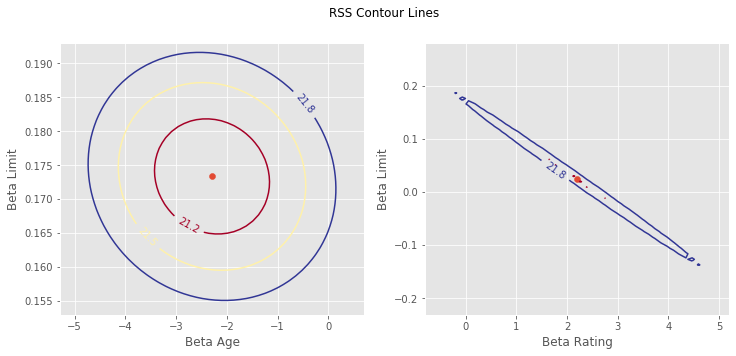

In [140]:
cmap = plt.cm.RdYlBu

fig, axes = plt.subplots(ncols=2, figsize=(12,5))

ax1=axes[0]
cs = ax1.contour(X1, Y1, Z1, cmap=cmap, levels=[21.25, 21.5, 21.8])
ax1.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_xlabel('Beta Age')
ax1.set_ylabel('Beta Limit')
ax1.scatter(ols_1.coef_[0], ols_1.coef_[1]);

ax2=axes[1]
cs = ax2.contour(X2, Y2, Z2, cmap=cmap, levels=[21.45, 21.8])
ax2.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_xlabel('Beta Rating')
ax2.set_ylabel('Beta Limit')
ax2.scatter(ols_2.coef_[0], ols_2.coef_[1]);


fig.suptitle('RSS Contour Lines');

## Multicolinearity

Detecting colinearity is not always possible in a multiple regression setting, as it is possible for colinearity to exist between three of more variables even if no pair of variables has a high correlation. This is called _multicolinearity_.

To detect multicolinearity, we can use the _variance inflation factor_ (VIF). The formula for VIF is:

$$
\text{VIF}(\hat{\beta}_j) = \frac{1}{1-R^2_{X_j|X_{-j}}}
$$

Where $R^2_{X_j|X_{-j}}$ is the $R^2$ from a regression of $X_j$ unto all of the other predictors. 


### Variance Inflaction Factor

In [141]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


### Fixing Multicolinearity

When faced with the problem of collinearity, there are two simple solutions. 

1. Drop one of the problematic variables from the regression. 
2. Combine the collinear variables together into a single predictor.
    - For instance, we might take the average of standardized versions of `limit` and `rating` in order to create a new variable that measures _credit worthiness_.


In [149]:
Limit_standard = scale(credit.Limit.astype('float'), with_std=True)
Rating_standard = scale(credit.Rating.astype('float'), with_std=True)

credit['credit_worthiness'] = (Limit_standard + Rating_standard)/2
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female,is_student,credit_worthiness
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,-0.477769
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,0.828482
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0,1.022049
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,2.089221
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,0.041671


In [157]:
print('Without addressing multicolinearity\n')
result1 = smf.ols('Balance ~ Age + Limit + Rating', credit).fit()
result1.summary()

Without addressing multicolinearity



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     403.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          4.84e-120
Time:                        14:54:27   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     396   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.5175     55.882     -4.644      0.000    -369.380    -149.655
Age           -2.3458      0.669     -3.508      0.001      -3.660      -1.031
Limit          0.0190      0.063      0.302      0.763      -0.105       0.143
Rating         2.3105      0.940      2.459      0.014       0.463       4.158
==============================================================================
Omnibus:                       20.764   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.727
Skew:                           0.360   Prob(JB):                     4.74e-08
Kurtosis:                       4.227   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
print('Multicolinearity addressed \n')
result2 = smf.ols('Balance ~ Age + credit_worthiness', credit).fit()
result2.summary()

Multicolinearity addressed 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     604.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          3.12e-121
Time:                        14:54:29   Log-Likelihood:                -2739.8
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     397   BIC:                             5498.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           649.4328     38.936     16.680      0.000     572.887     725.979
Age                  -2.3248      0.668     -3.478      0.001      -3.639      -1.011
credit_worthiness   400.8319     11.526     34.778      0.000     378.173     423.491
==============================================================================
Omnibus:                       20.092   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.824
Skew:                           0.369   Prob(JB):                     2.03e-07
Kurtosis:                       4.142   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Result**

Notice in the results above that the R2 score of the first model (with multicolinearity) only drops from 0.754 to 0.753 after addressing the problem by taking the average of the two colinear variables. 